In [1]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import colorama
from colorama import Fore
from colorama import Style

sns.mpl.rc("figure", figsize=(10, 5))

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [4]:
% cd /content/drive/MyDrive/BusinessAnalytics 

/content/drive/MyDrive/BusinessAnalytics


# 1. Importing the data

In [5]:
raw_df = pd.read_excel("LGA_JulyDecember_FINALdaily.xlsx", sheet_name = "ALL")

In [6]:
# display the first rows of the dataset
raw_df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DATE,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,...,WIND_SPEED,PRESSURE,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,2019,3,7,1,1,2019-07-01,779,NK,N658NK,LGA,...,9.40,1012.2,0,0,0,0,0,0,0,0
1,2019,3,7,2,2,2019-07-02,779,NK,N679NK,LGA,...,6.71,1009.5,0,0,0,0,0,0,0,0
2,2019,3,7,3,3,2019-07-03,779,NK,N664NK,LGA,...,6.26,1010.4,0,0,0,0,0,0,0,0
3,2019,3,7,4,4,2019-07-04,779,NK,N668NK,LGA,...,8.28,1017.1,0,0,0,0,0,0,1,0
4,2019,3,7,5,5,2019-07-05,779,NK,N665NK,LGA,...,7.61,1019.7,0,0,0,0,0,0,1,0


In [7]:
#display the number of rows and columns of the dataset
raw_df.shape

(83759, 37)

In [8]:
#columns'name of the dataset
raw_df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DATE',
       'MKT_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'DEP_SCHED', 'DEP_HOUR', 'DEP_OBS', 'DEP_DELAY', 'DEP_DEL15',
       'TAXI_OUT', 'ARR_SCHED', 'ARR_DELAY', 'ARR_DEL15', 'DISTANCE',
       'NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'MANUFACTURE_YEAR',
       'AVG_TEMPERATURE', 'PRCP', 'WIND_DIR', 'WIND_SPEED', 'PRESSURE', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09'],
      dtype='object')

# 2. Data cleaning

## 2.1 Dropping unessential columns

The raw dataset contains unessential columns that can be dropped. These are the following and the reason why we drop them. 
- **YEAR**: always the same year. Contains no information.
- **QUARTER**: gives the same information than the MONTH variable.
- **DATE**: gives the same information than the DAY_OF_MONTH and MONTH variables.
- **TAIL_NUM**: no real predictive power. 
- **ORIGIN**: always the same origin airport. Contains no information.
- **DEP_OBS** & **DEP_SCHED**: too much redundant information. We decided to keep only a time slot of departure with DEP_HOUR.
- **ARR_SCHED** & **ARR_OBS**: redundant information with ARR_DEL15.
- **WT05** & **WT09**: No observations of these features.
- **MKT_CARRIER_FL_NUM**: no real predictive power.

As you may understand, we have dropped a lot of variables either because they face multicolinearity with other variables, or because they have no real predictive power.

In [9]:
#dropping unessential columns
col_dropped = ['YEAR','QUARTER','DATE','TAIL_NUM','ORIGIN','DEP_OBS',
               'ARR_SCHED','ARR_DELAY','WT05','WT09','DEP_DEL15','DEP_SCHED']
col_dropped.append('MKT_CARRIER_FL_NUM')
#col_dropped.append('DEP_DELAY')
df = raw_df.drop(col_dropped, axis=1)

## 2.2 Handling missing values

In [10]:
#Counting missing values for each column
for i in df.columns:
    na = df[i].isna().sum()
    print(Fore.BLUE + Style.BRIGHT + "There are",na, "missing values in column",i + Style.RESET_ALL)
    if na > 0 :
        print(df[df[i].isna() == True])

There are 0 missing values in column MONTH
There are 0 missing values in column DAY_OF_MONTH
There are 0 missing values in column DAY_OF_WEEK
There are 0 missing values in column OP_UNIQUE_CARRIER
There are 0 missing values in column DEST
There are 0 missing values in column DEP_HOUR
There are 0 missing values in column DEP_DELAY
There are 0 missing values in column TAXI_OUT
There are 0 missing values in column ARR_DEL15
There are 0 missing values in column DISTANCE
There are 994 missing values in column NUMBER_OF_SEATS
       MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER DEST  DEP_HOUR  \
287        7            28            7                YV  IAD        10   
303        7             6            6                YV  IAH        15   
317        7             1            1                EV  CLE         8   
318        7             2            2                EV  CLE         8   
319        7             3            3                EV  CLE         8   
...      ...      

**Rows with missing values will be simply dropped** because there are very few of them compared to the total number of rows.
The loss of information is minimal and the dataset size remains largely sufficient to estimate correctly our models. 

In [11]:
#dropping rows with missing values
df.dropna(axis=0,inplace=True)

## 2.3 Handling data type

In [12]:
# checking the columns data type
df.dtypes

MONTH                   int64
DAY_OF_MONTH            int64
DAY_OF_WEEK             int64
OP_UNIQUE_CARRIER      object
DEST                   object
DEP_HOUR                int64
DEP_DELAY               int64
TAXI_OUT                int64
ARR_DEL15               int64
DISTANCE                int64
NUMBER_OF_SEATS       float64
CAPACITY_IN_POUNDS    float64
MANUFACTURE_YEAR      float64
AVG_TEMPERATURE         int64
PRCP                  float64
WIND_DIR                int64
WIND_SPEED            float64
PRESSURE              float64
WT01                    int64
WT02                    int64
WT03                    int64
WT04                    int64
WT06                    int64
WT08                    int64
dtype: object

In [13]:
#transforming data type of certain columns to be more consistent
df = df.astype({"NUMBER_OF_SEATS":int, "CAPACITY_IN_POUNDS":int, "MANUFACTURE_YEAR":int, 
                        "DEP_HOUR":int},errors="raise")
df.dtypes

MONTH                   int64
DAY_OF_MONTH            int64
DAY_OF_WEEK             int64
OP_UNIQUE_CARRIER      object
DEST                   object
DEP_HOUR                int64
DEP_DELAY               int64
TAXI_OUT                int64
ARR_DEL15               int64
DISTANCE                int64
NUMBER_OF_SEATS         int64
CAPACITY_IN_POUNDS      int64
MANUFACTURE_YEAR        int64
AVG_TEMPERATURE         int64
PRCP                  float64
WIND_DIR                int64
WIND_SPEED            float64
PRESSURE              float64
WT01                    int64
WT02                    int64
WT03                    int64
WT04                    int64
WT06                    int64
WT08                    int64
dtype: object

## 2.4 Handling duplicated rows

In [14]:
# summing all dupplicated rows
df.duplicated().sum()

1

In [15]:
#dropping duplicated rows
if df.duplicated().sum() != 0:
    df.drop_duplicates(keep='last')

In [16]:
# resetting the rows indexes to have a continuous series
df = df.reset_index(drop=True)

# 3. Data analysis

## 3.1 Data visualization

### 3.1.1 Delay as a function of months

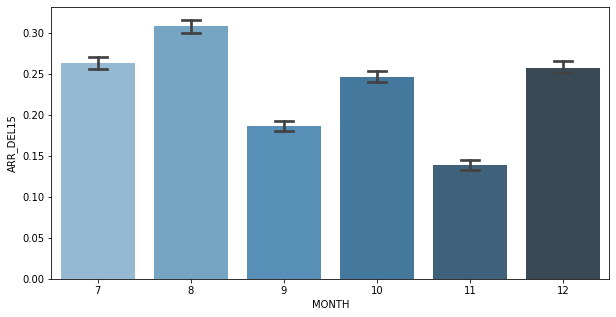

In [17]:
sns.barplot(x='MONTH',y='ARR_DEL15',data=raw_df, capsize=.2, palette="Blues_d")

### 3.1.2 Delay as a function of the weekday

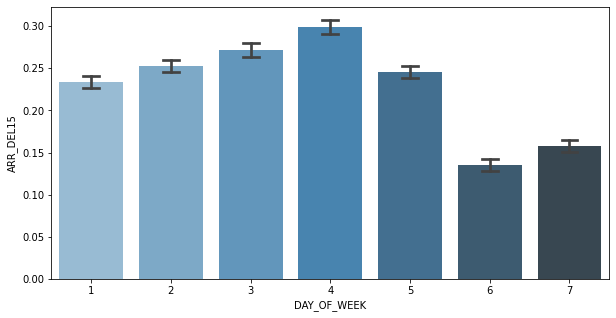

In [18]:
sns.barplot(x='DAY_OF_WEEK',y='ARR_DEL15',data=raw_df, capsize=.2, palette="Blues_d")

### 3.1.3 Delay as a function of the departure hour

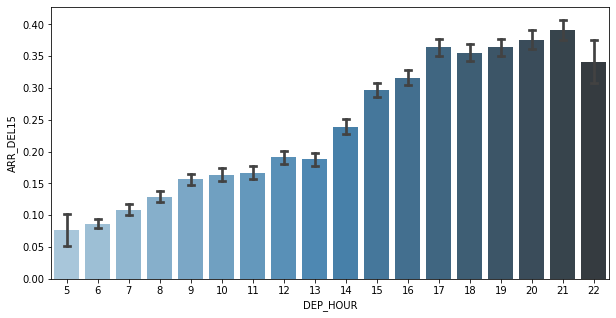

In [19]:
sns.barplot(x='DEP_HOUR',y='ARR_DEL15',data=raw_df, capsize=.2, palette="Blues_d")

### 3.1.4 Delay as a function of the carrier operator

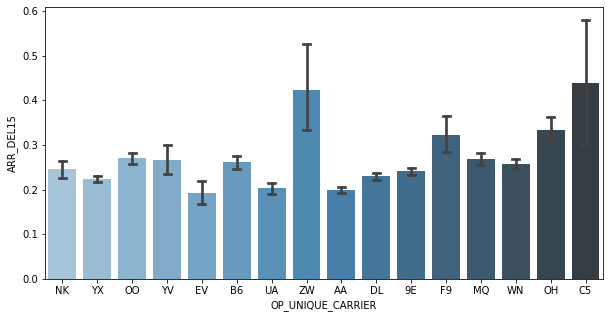

In [20]:
sns.barplot(x='OP_UNIQUE_CARRIER',y='ARR_DEL15',data=raw_df, capsize=.2, palette="Blues_d")

### 3.1.5 Distribution of continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f922d88d050>,
      dtype=object)

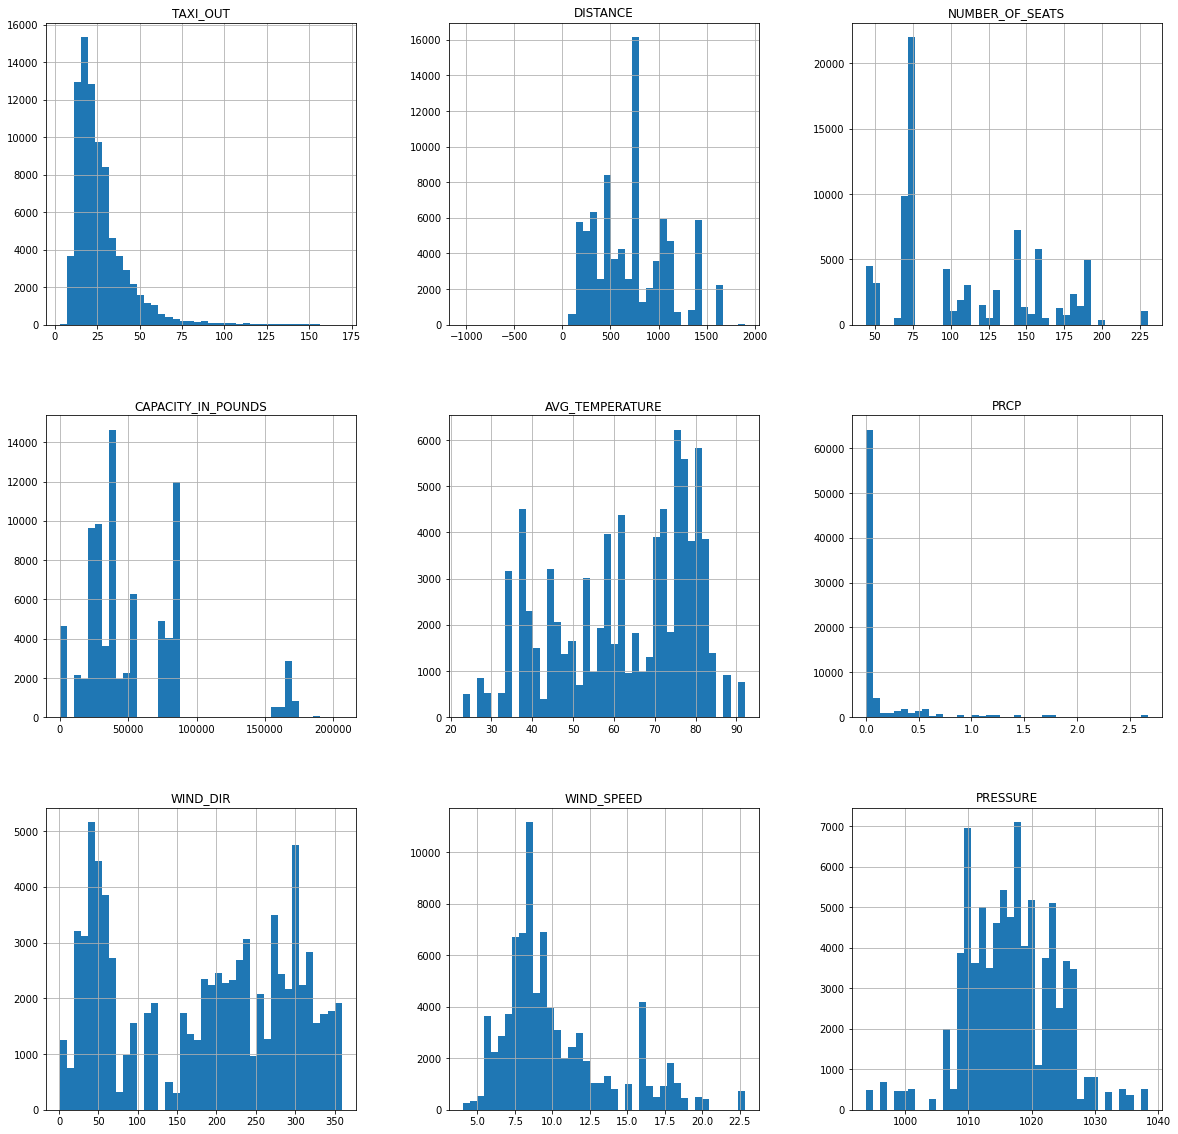

In [21]:
var = ['TAXI_OUT','DISTANCE','NUMBER_OF_SEATS',
      'CAPACITY_IN_POUNDS','AVG_TEMPERATURE','PRCP','WIND_DIR','WIND_SPEED','PRESSURE']
df[var].hist(bins=40, figsize = (20,20))

## 3.2 Correlation analysis

In [22]:
# Correlation coefficients between ARR_DEL15 (target value) and each predictor
corr = df.corr()
print(corr['ARR_DEL15'].sort_values(ascending=False))

ARR_DEL15             1.000000
DEP_DELAY             0.544038
TAXI_OUT              0.409832
DEP_HOUR              0.234376
WT01                  0.156828
WT03                  0.130719
PRCP                  0.128860
WT08                  0.116215
WIND_SPEED            0.088107
WT04                  0.056027
AVG_TEMPERATURE       0.042208
WT06                  0.034304
WT02                  0.020355
MANUFACTURE_YEAR     -0.010352
DISTANCE             -0.016343
CAPACITY_IN_POUNDS   -0.019461
NUMBER_OF_SEATS      -0.028189
MONTH                -0.054981
DAY_OF_MONTH         -0.064631
DAY_OF_WEEK          -0.070924
WIND_DIR             -0.101798
PRESSURE             -0.109972
Name: ARR_DEL15, dtype: float64


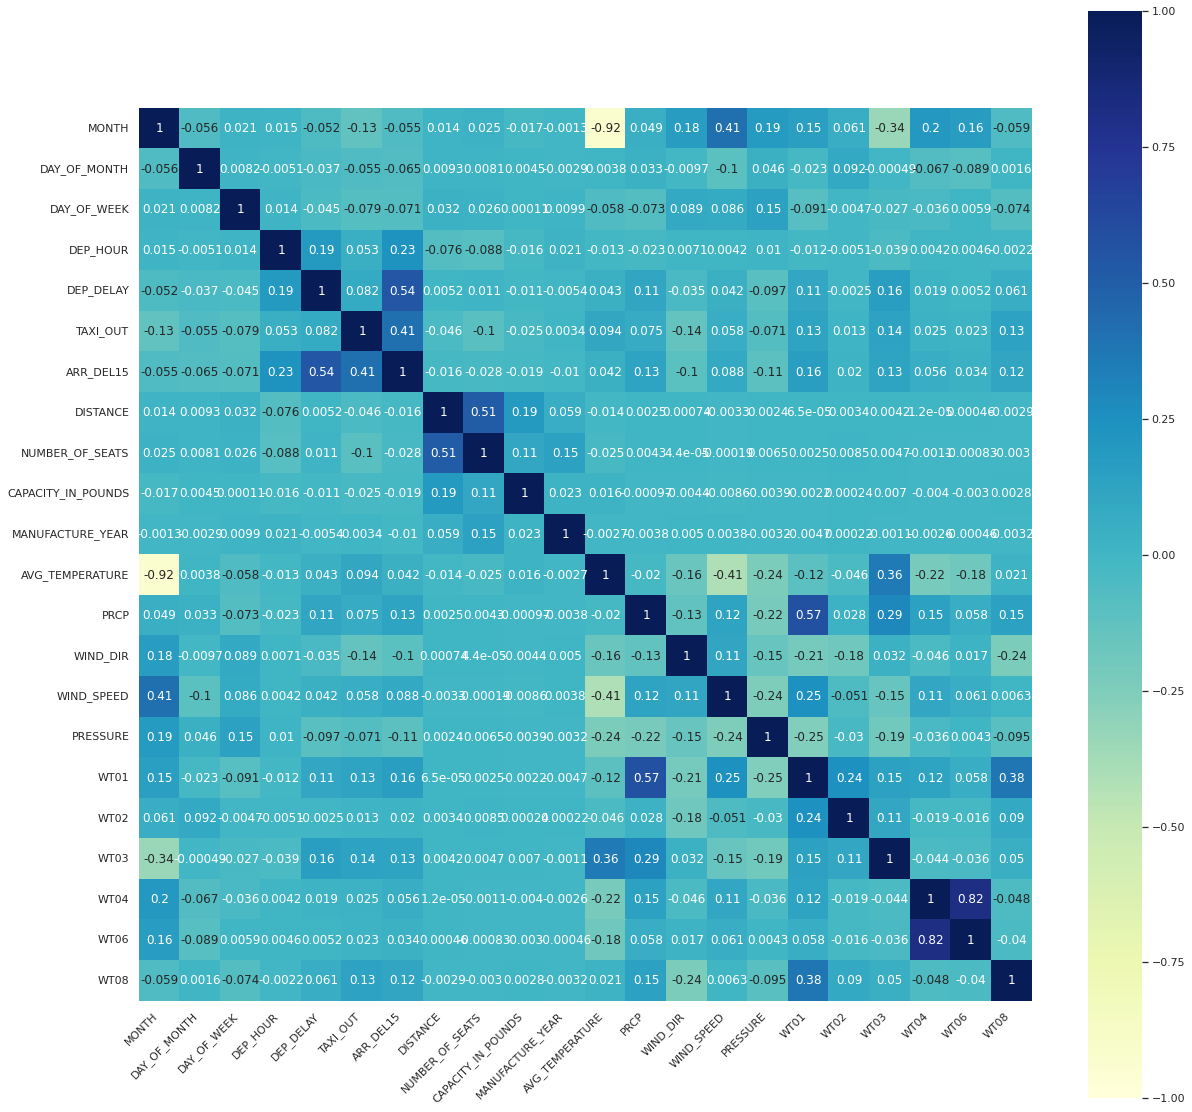

In [23]:
# heating map to visualize the correlation between variables
corr=df.corr()
sns.set(rc={"figure.figsize":(20, 20)})
ax = sns.heatmap(corr, 
   vmin=-1, vmax=1, center=0,
   square=True, annot=True, cmap="YlGnBu")
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set(rc={"figure.figsize":(10, 6)})

## 3.3 Dummy variables

In [24]:
#counting occurences of each OP_UNIQUE_CARRIER
df['OP_UNIQUE_CARRIER'].value_counts()

YX    16004
DL    14661
9E    12702
AA    12298
WN     6126
OO     4925
MQ     4524
UA     4264
B6     2887
NK     1955
OH     1013
YV      718
F9      535
EV      140
C5       13
Name: OP_UNIQUE_CARRIER, dtype: int64

In [25]:
df= pd.concat([df, pd.get_dummies(df['OP_UNIQUE_CARRIER'])], axis=1)
df.drop(columns = ['OP_UNIQUE_CARRIER'], inplace = True)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,DEP_HOUR,DEP_DELAY,TAXI_OUT,ARR_DEL15,DISTANCE,NUMBER_OF_SEATS,...,EV,F9,MQ,NK,OH,OO,UA,WN,YV,YX
0,7,1,1,FLL,20,4,11,0,1076,228,...,0,0,0,1,0,0,0,0,0,0
1,7,2,2,FLL,20,-7,37,0,1076,228,...,0,0,0,1,0,0,0,0,0,0
2,7,3,3,FLL,20,19,12,0,1076,228,...,0,0,0,1,0,0,0,0,0,0
3,7,4,4,FLL,20,-4,15,0,1076,228,...,0,0,0,1,0,0,0,0,0,0
4,7,5,5,FLL,20,-4,13,0,1076,228,...,0,0,0,1,0,0,0,0,0,0


In [26]:
df['DEST'].value_counts()

ORD    6835
BOS    4886
ATL    4672
DFW    3305
DCA    2972
       ... 
HHH       9
BZN       8
SAT       4
EGE       2
MTJ       2
Name: DEST, Length: 77, dtype: int64

In [27]:
df= pd.concat([df, pd.get_dummies(df['DEST'])], axis=1)
df.drop(columns = ['DEST'], inplace = True)
df.head() 

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_HOUR,DEP_DELAY,TAXI_OUT,ARR_DEL15,DISTANCE,NUMBER_OF_SEATS,CAPACITY_IN_POUNDS,...,SAT,SAV,SDF,SRQ,STL,SYR,TPA,TVC,TYS,XNA
0,7,1,1,20,4,11,0,1076,228,43600,...,0,0,0,0,0,0,0,0,0,0
1,7,2,2,20,-7,37,0,1076,228,43600,...,0,0,0,0,0,0,0,0,0,0
2,7,3,3,20,19,12,0,1076,228,43600,...,0,0,0,0,0,0,0,0,0,0
3,7,4,4,20,-4,15,0,1076,228,43600,...,0,0,0,0,0,0,0,0,0,0
4,7,5,5,20,-4,13,0,1076,228,35600,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#checking the dataset dimension
df.shape

(82765, 114)

## 3.4 Separation target variable and predictors

In [29]:
pd.set_option('display.max_rows', 500)
corr = df.corr()
print(corr['ARR_DEL15'].sort_values(ascending=False))
pd.reset_option('all')

ARR_DEL15             1.000000
DEP_DELAY             0.544038
TAXI_OUT              0.409832
DEP_HOUR              0.234376
WT01                  0.156828
WT03                  0.130719
PRCP                  0.128860
WT08                  0.116215
WIND_SPEED            0.088107
WT04                  0.056027
AVG_TEMPERATURE       0.042208
WT06                  0.034304
OH                    0.026343
FLL                   0.025374
OO                    0.021169
WT02                  0.020355
DAY                   0.019906
MQ                    0.019019
CAK                   0.018639
MHT                   0.018423
BOS                   0.017635
F9                    0.016940
DAL                   0.016082
WN                    0.014498
GSO                   0.012851
B6                    0.011859
PWM                   0.011633
MEM                   0.010992
CHO                   0.010365
DSM                   0.009725
IAD                   0.009720
CAE                   0.009529
MDW     

/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [30]:
X = df.drop("ARR_DEL15", axis = 1)
y = df["ARR_DEL15"]

## 3.5 Train, valid, test sets

In [31]:
nb_rows = int(X.shape[0]*0.2) # Obviously we don't want a floating number 

X_valid = X.sample(n=nb_rows, random_state = 0)
valid_index = X_valid.index
y_valid = y[valid_index]

X_intermediate = X.drop(valid_index, axis = 0)
X_test = X_intermediate.sample(n=nb_rows, random_state = 0)
test_index = X_test.index
y_test = y[test_index]

X_train = X_intermediate.drop(test_index, axis = 0)
train_index = X_train.index
y_train = y[train_index]

In [32]:
print("Total # of samples:", df.shape[0])
print("# of training samples:", X_train.shape[0])
print("# of validation samples:", X_valid.shape[0])
print("# of test samples:", X_test.shape[0])

Total # of samples: 82765
# of training samples: 49659
# of validation samples: 16553
# of test samples: 16553


# 4. Decision tree

# 4.1 First decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
from sklearn import metrics

In [36]:
y_pred = model.predict(X_valid)

In [37]:
conf_matrix = metrics.confusion_matrix(y_valid, y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

In [38]:
specificity = true_neg / (true_neg + false_pos)
print("Specificity:", specificity)

Specificity: 0.9477305076704096


In [39]:
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity:", sensitivity)

Sensitivity: 0.8372152546711031


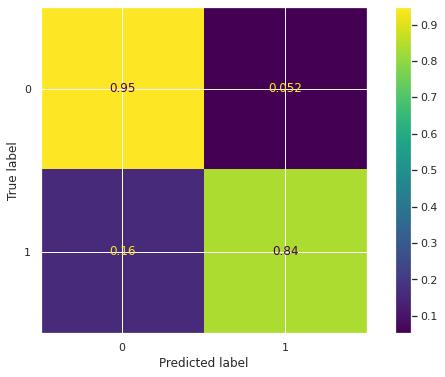

In [40]:
norm_conf_matrix = metrics.confusion_matrix(y_valid, y_pred, normalize = 'true')
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix)
fig.plot() #  Creates the figure
plt.show() #  Displays the figure

In [41]:
accuracy = metrics.accuracy_score(y_valid, y_pred)
misclassification = 1 - accuracy
print("Misclassification rate:", misclassification)

Misclassification rate: 0.07835437685011781


# 4.2 Optimization of the decision tree

First we need to search the optimal number of leaf nodes for the tree

In [42]:
misclassification_leaf = {} # Empty dictionary which will contain each misclassification rate along with its max_leaf_node value

for i in range(2,75):
    tree = DecisionTreeClassifier(max_leaf_nodes=i, random_state = 0) #we specify a maximum number of node
    tree.fit(X_train,y_train)

    pred = tree.predict(X_valid)
    acc = metrics.accuracy_score(y_valid, pred) #probability of making a good classification
    misclassified = 1 - acc
    misclassification_leaf[i] = misclassified

[Text(0, 0.5, 'Misclassification rate'),
 Text(0.5, 0, 'Max leaf'),
 Text(0.5, 1.0, 'Misclassification rate with respect to the maximum number of leaf nodes')]

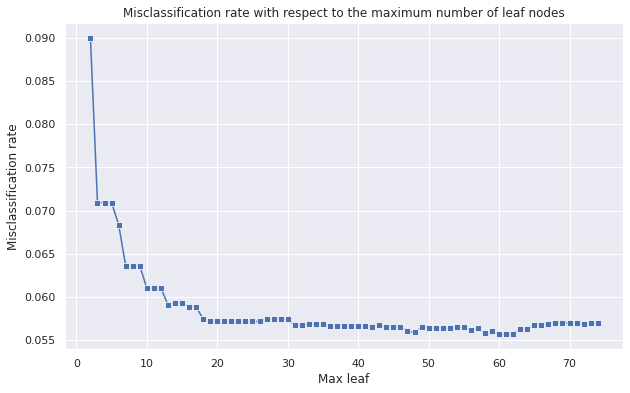

In [43]:
leaf = sns.lineplot(x=misclassification_leaf.keys(), y=misclassification_leaf.values(), marker='s')
leaf.set(xlabel='Max leaf', ylabel='Misclassification rate', 
         title='Misclassification rate with respect to the maximum number of leaf nodes')

Secondly, we need test the depth of the tree

In [44]:
misclassification_depth = {}

for j in range(1, 15):
    tree = DecisionTreeClassifier(max_depth=j, random_state = 0)
    tree.fit(X_train,y_train)

    pred = tree.predict(X_valid)
    acc = metrics.accuracy_score(y_valid, pred)
    misclassified = 1 - acc
    misclassification_depth[j] = misclassified

[Text(0, 0.5, 'Misclassification rate'),
 Text(0.5, 0, 'Max Depth'),
 Text(0.5, 1.0, 'Misclassification rate with respect to the maximum depth')]

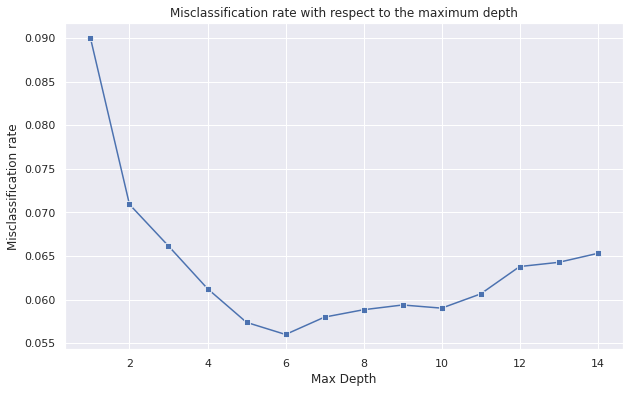

In [45]:
depth = sns.lineplot(x=misclassification_depth.keys(), y=misclassification_depth.values(), marker='s')
depth.set(xlabel='Max Depth', ylabel='Misclassification rate',
          title='Misclassification rate with respect to the maximum depth')

In [46]:
opti_model = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 50, random_state = 0)
opti_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, random_state=0)

In [47]:
opti_y_pred = opti_model.predict(X_valid)
opti_conf_matrix = metrics.confusion_matrix(y_valid, opti_y_pred)
opti_true_neg, opti_false_pos, opti_false_neg, opti_true_pos = opti_conf_matrix.ravel()

In [48]:
opti_specificity = opti_true_neg / (opti_true_neg + opti_false_pos)
print("Optimal Specificity:", opti_specificity)

Optimal Specificity: 0.9768306183773525


In [49]:
opti_sensitivity = opti_true_pos / (opti_true_pos + opti_false_neg)
print("Optimal Sensitivity:", opti_sensitivity)

Optimal Sensitivity: 0.8379831072434093


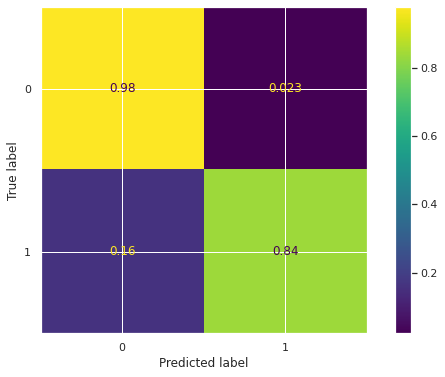

In [50]:
opti_norm_conf_matrix = metrics.confusion_matrix(y_valid, opti_y_pred, normalize = 'true')
opti_fig = metrics.ConfusionMatrixDisplay(opti_norm_conf_matrix)
opti_fig.plot() 
plt.show() 

In [51]:
opti_accuracy = metrics.accuracy_score(y_valid, opti_y_pred)
opti_misclassification = 1 - opti_accuracy
print("Optimal Misclassification rate:", opti_misclassification)

Optimal Misclassification rate: 0.055941521174409425


In [52]:
from sklearn.tree import plot_tree

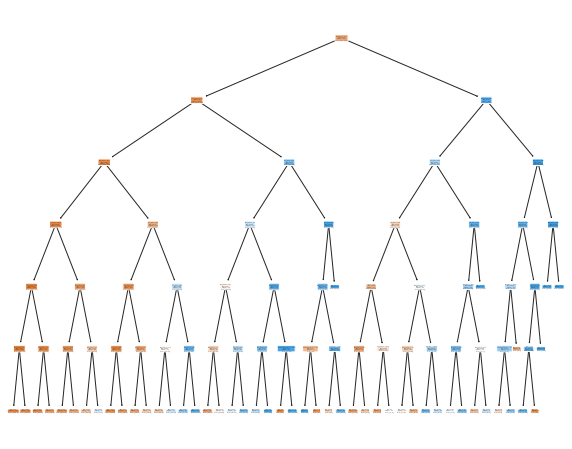

In [53]:
opti_tree = plt.figure(figsize=(10,8))
plot_tree(opti_model, feature_names=X.columns, filled=True, rounded=True, precision=4)
opti_tree.savefig('opti_tree.pdf')
plt.show()

## 4.3 Test the optimized decision tree

In [54]:
test_pred = opti_model.predict(X_test)
test_conf_matrix = metrics.confusion_matrix(y_test, test_pred)
test_true_neg, test_false_pos, test_false_neg, test_true_pos = test_conf_matrix.ravel()

In [55]:
test_specificity = test_true_neg / (test_true_neg + test_false_pos)
print("Test Specificity:", test_specificity)

Test Specificity: 0.9768416060701866


In [56]:
test_sensitivity = test_true_pos / (test_true_pos + test_false_neg)
print("Test Sensitivity:", test_sensitivity)

Test Sensitivity: 0.833376057421174


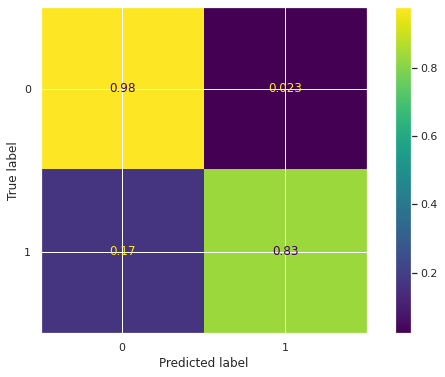

In [57]:
test_norm_conf_matrix = metrics.confusion_matrix(y_test, test_pred, normalize = 'true')
test_fig = metrics.ConfusionMatrixDisplay(test_norm_conf_matrix)
test_fig.plot() 
plt.show() 

In [58]:
test_accuracy = metrics.accuracy_score(y_test, test_pred)
test_misclassification = 1 - test_accuracy
print("Test Misclassification rate:", test_misclassification)

Test Misclassification rate: 0.05696852534283814


# 5. Logistic regression

## 5.1 Logistic regression on the full set of features

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_reg = LogisticRegression(penalty = 'l2',max_iter=500, solver='lbfgs')

In [61]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [62]:
y_pred = log_reg.predict(X_valid)

In [63]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [64]:
conf_matrix = metrics.confusion_matrix(y_valid, y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

In [65]:
specificity = true_neg / (true_neg + false_pos)
print("Specificity:", specificity)

Specificity: 0.9770678475407243


In [66]:
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity:", sensitivity)

Sensitivity: 0.8454056821090351


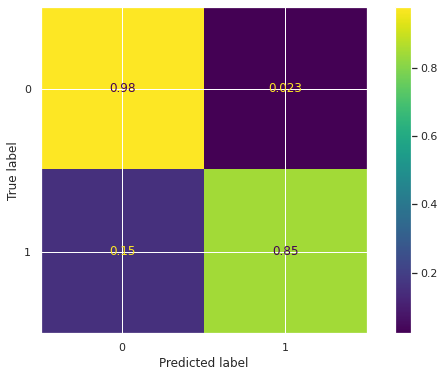

In [67]:
norm_conf_matrix = metrics.confusion_matrix(y_valid, y_pred, normalize = 'true')
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix)
fig.plot() #  Creates the figure
plt.show() #  Displays the figure

In [68]:
accuracy = metrics.accuracy_score(y_valid, y_pred)
misclassification = 1 - accuracy
print("Optimal Misclassification rate:", misclassification)

Optimal Misclassification rate: 0.05400833685736728


## 5.2 Dimension reduction - Principal Component Analysis

A model with all features is very complex to train. Let's first reduce the feature set dimension

In [69]:
X.shape

(82765, 113)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
y_pca = df['ARR_DEL15']
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [73]:
# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

Eigenvalues:
[3.34266666e+00 2.72516404e+00 2.48027810e+00 2.33771500e+00
 2.09403230e+00 1.92770440e+00 1.86121635e+00 1.80354618e+00
 1.74457975e+00 1.73111781e+00 1.63375084e+00 1.54958778e+00
 1.54653835e+00 1.49182155e+00 1.43128221e+00 1.41013968e+00
 1.28991648e+00 1.24927685e+00 1.13784680e+00 1.12310253e+00
 1.09788630e+00 1.07060684e+00 1.04951185e+00 1.03913333e+00
 1.03773087e+00 1.03567067e+00 1.03073815e+00 1.02928928e+00
 1.02781326e+00 1.02644807e+00 1.02448205e+00 1.02440113e+00
 1.02251275e+00 1.02167682e+00 1.01874716e+00 1.01683698e+00
 1.01549905e+00 1.01537703e+00 1.01457278e+00 1.01334759e+00
 1.01236730e+00 1.01226205e+00 1.01156722e+00 1.01093214e+00
 1.01062554e+00 1.00968927e+00 1.00934451e+00 1.00921729e+00
 1.00882837e+00 1.00834778e+00 1.00765049e+00 1.00751400e+00
 1.00721627e+00 1.00696774e+00 1.00660536e+00 1.00598084e+00
 1.00584695e+00 1.00568658e+00 1.00552863e+00 1.00514635e+00
 1.00509510e+00 1.00492140e+00 1.00476150e+00 1.00443142e+00
 1.00356400

In [74]:
# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print("i.e:2.95% of the dataset's variance lies along the first PC")

Variances (Percentage):
[2.95807635e+00 2.41162045e+00 2.19490985e+00 2.06874934e+00
 1.85310354e+00 1.70591248e+00 1.64707421e+00 1.59603928e+00
 1.54385723e+00 1.53194416e+00 1.44577974e+00 1.37130005e+00
 1.36860147e+00 1.32018011e+00 1.26660612e+00 1.24789614e+00
 1.14150521e+00 1.10554137e+00 1.00693190e+00 9.93884034e-01
 9.71569056e-01 9.47428233e-01 9.28760326e-01 9.19575905e-01
 9.18334806e-01 9.16511646e-01 9.12146638e-01 9.10864466e-01
 9.09558264e-01 9.08350149e-01 9.06610326e-01 9.06538717e-01
 9.04867603e-01 9.04127858e-01 9.01535268e-01 8.99844866e-01
 8.98660869e-01 8.98552888e-01 8.97841168e-01 8.96756941e-01
 8.95889441e-01 8.95796299e-01 8.95181418e-01 8.94619406e-01
 8.94348081e-01 8.93519531e-01 8.93214442e-01 8.93101854e-01
 8.92757686e-01 8.92332385e-01 8.91715325e-01 8.91594535e-01
 8.91331063e-01 8.91111127e-01 8.90790437e-01 8.90237778e-01
 8.90119294e-01 8.89977369e-01 8.89837591e-01 8.89499300e-01
 8.89453940e-01 8.89300231e-01 8.89158726e-01 8.88866621e-01


Text(0, 0.5, 'Explained variance (%)')

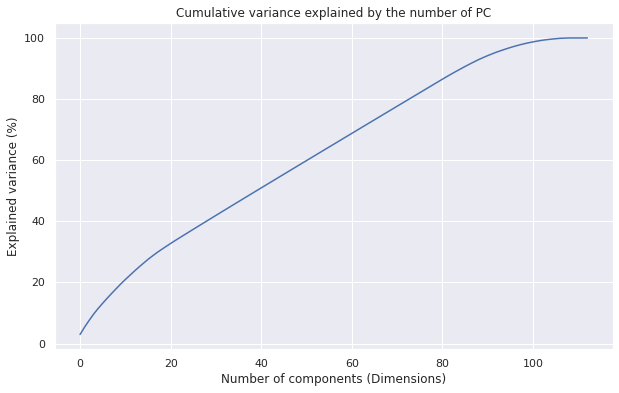

In [75]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.title("Cumulative variance explained by the number of PC")
plt.ylabel("Explained variance (%)")

In [76]:
# Apply PCA with the right number of components
from sklearn.decomposition import PCA
pca = PCA(n_components=95)
X_pca = pca.fit_transform(X_scaled)

In [77]:
# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

         0         1         2         3         4         5         6   \
0  2.938855 -0.884240 -2.360269 -0.666186 -1.597411 -0.295205  0.264549   
1  2.814842 -1.447527 -2.460423 -0.363794 -1.712694 -0.442803  0.281566   
2  2.939291 -1.620361 -2.491727 -0.278649 -1.606721 -0.355947  0.290496   
3  2.921793 -1.446713 -2.441713  0.219608 -1.626694 -0.359326  0.259601   
4  2.919066 -1.254050 -2.549874 -0.091717 -1.598630 -0.361457  0.265936   

         7         8         9   ...        85        86        87        88  \
0  1.361379  0.903838  3.244344  ...  1.169753  0.380483  0.994115 -0.247859   
1  1.386878  0.878111  3.224807  ...  1.146373 -0.306125  0.383456  0.494222   
2  1.346586  0.965900  3.245599  ...  0.676274  0.199580  1.131936 -0.590742   
3  1.272483  0.984239  3.195070  ... -0.192857 -0.575873  1.259765 -1.136900   
4  1.272449  0.991538  3.208512  ... -0.454230 -0.536472  1.249034 -1.162880   

         89        90        91        92        93        94  
0 -0

## 5.3 Logistic regression with PCA

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.20, 
                                                                    shuffle=True, random_state=1)

In [80]:
import statsmodels.api as sm
model = sm.Logit(y_train_pca, X_train_pca)
results = model.fit(maxiter = 1000) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.241781
         Iterations 9


### 5.3.1 Model Evaluation - Test

In [81]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:              ARR_DEL15   No. Observations:                66212
Model:                          Logit   Df Residuals:                    66117
Method:                           MLE   Df Model:                           94
Date:                Mon, 23 May 2022   Pseudo R-squ.:                  0.5554
Time:                        20:48:04   Log-Likelihood:                -16009.
converged:                       True   LL-Null:                       -36010.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.1549      0.008    -19.495      0.000      -0.171      -0.139
1             -0.4759      0.009    -53.939      0.000      -0.493      -0.459
2             -0.0810      0.009     -8.810      0.0

In [82]:
odds_ratio = np.exp(results.params)
print(odds_ratio)

0      0.856474
1      0.621332
2      0.922200
3      6.458300
4      1.287355
        ...    
90    47.346819
91     2.585554
92     1.787009
93     1.077391
94     0.775258
Length: 95, dtype: float64


In [83]:
y_pred = round(results.predict(X_test_pca))

In [84]:
from sklearn import metrics

In [85]:
conf_matrix = metrics.confusion_matrix(y_test_pca, y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

In [86]:
specificity = true_neg / (true_neg + false_pos)
print("Specificity:", specificity)

Specificity: 0.9089038385437277


In [87]:
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity:", sensitivity)

Sensitivity: 0.8810617662072486


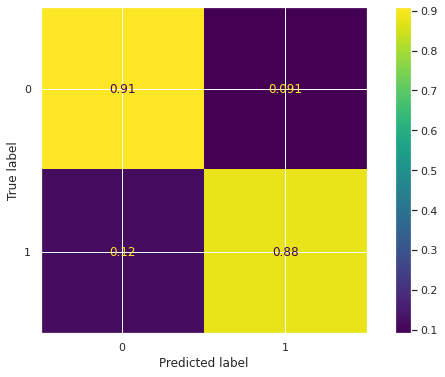

In [88]:
norm_conf_matrix = metrics.confusion_matrix(y_test_pca, y_pred, normalize = 'true')
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix)
fig.plot() #  Creates the figure
plt.show() #  Displays the figure

In [89]:
accuracy = metrics.accuracy_score(y_test_pca, y_pred)
miss_classification = 1 - accuracy
print("Misclassification rate:", miss_classification)

Misclassification rate: 0.09768622002054006


# 6. Artificial Neural Network

## 6.1 ANN construction

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
network = MLPClassifier(hidden_layer_sizes=(10), random_state=0, max_iter=500)
network.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=10, max_iter=500, random_state=0)

In [92]:
print("# of layers:", network.n_layers_)
print("Output activation function:", network.out_activation_)
print("Coefficients:", network.coefs_)
print("Biases:", network.intercepts_)

# of layers: 3
Output activation function: logistic
Coefficients: [array([[-9.35087552e-003,  7.39462193e-002, -1.99803844e-002, ...,
        -8.02368503e-003,  1.16659893e-001,  4.17519248e-003],
       [ 9.61430529e-002, -7.42596708e-003, -2.04770604e-002, ...,
         2.14708513e-003,  2.59433074e-001,  1.12410372e-002],
       [ 1.78620710e-001,  1.12359638e-001, -1.90899808e-002, ...,
        -9.61142788e-003,  9.47714979e-002, -1.30361391e-001],
       ...,
       [-5.80314308e-104, -3.45412325e-083, -3.44321250e-101, ...,
         3.75341578e-083, -5.19749024e-002, -1.74119732e-001],
       [-8.43270980e-096,  5.44600321e-114, -7.37145271e-110, ...,
         2.38062847e-007,  1.94137963e-001,  1.19095446e-001],
       [-1.40486988e-116, -1.94081783e-090, -2.54009006e-080, ...,
         3.19875649e-005, -4.47897521e-001,  3.16769244e-001]]), array([[-5.45234645e-01],
       [-1.43671114e-01],
       [-1.35568001e-02],
       [ 2.38949954e-01],
       [-6.08648217e-01],
       [ 

## 6.2 Evaluation of the model

In [93]:
from sklearn import metrics

In [94]:
y_pred = network.predict(X_test)

In [95]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

In [96]:
specificity = true_neg / (true_neg + false_pos)
print("Specificity:", specificity)

Specificity: 0.9967594056275688


In [97]:
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity:", sensitivity)

Sensitivity: 0.5467828761855934


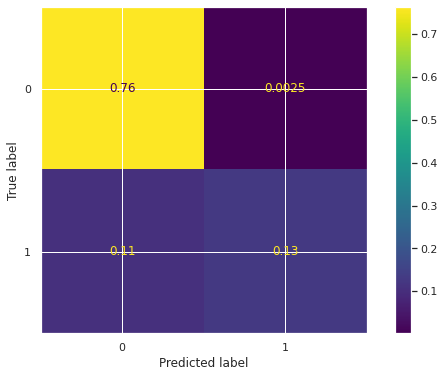

In [98]:
norm_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix/X_test.shape[0])
fig.plot() #  Creates the figure
plt.show() #  Displays the figure

In [99]:
accuracy = metrics.accuracy_score(y_test, y_pred)
misclassification = 1 - accuracy
print("Misclassification rate:", misclassification)

Misclassification rate: 0.1092853259227935


## 6.3 Optimization of the model

In [100]:
X_trainvalid=X_train
X_trainvalid.append(X_valid)
y_trainvalid=y_train
y_trainvalid.append(y_valid)
network = MLPClassifier(hidden_layer_sizes=(10),early_stopping=True,validation_fraction=0.25,n_iter_no_change=50,  
                        random_state=0, max_iter=5000)
network.fit(X_trainvalid.values, y_trainvalid)

MLPClassifier(early_stopping=True, hidden_layer_sizes=10, max_iter=5000,
              n_iter_no_change=50, random_state=0, validation_fraction=0.25)

In [101]:
print("Number of iterations: {}".format(network.n_iter_))
pred = network.predict(X_trainvalid.values)
acc = metrics.accuracy_score(y_trainvalid, pred)
print("TrainingValidation error: {}".format(1 - acc))
pred = network.predict(X_test.values)
acc = metrics.accuracy_score(y_test, pred)
print("Test error: {}".format(1 - acc))

Number of iterations: 119
TrainingValidation error: 0.04994059485692426
Test error: 0.052437624599770416


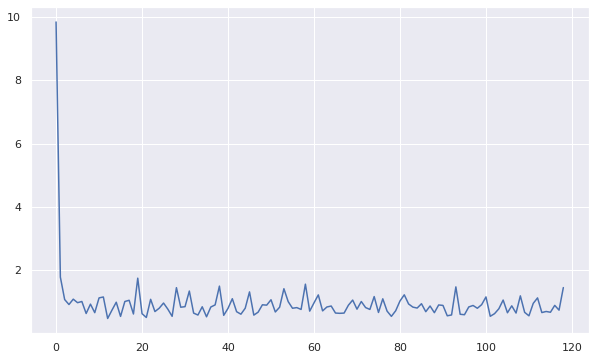

In [102]:
sns.lineplot(data=network.loss_curve_)

## 6.4 Complexity reduction ANN

In [103]:
reduced_network = MLPClassifier(hidden_layer_sizes=(10), early_stopping=True,validation_fraction=0.25,n_iter_no_change=50,
                                random_state=0, max_iter=5000)
reduced_network.fit(X_train_pca, y_train_pca)

MLPClassifier(early_stopping=True, hidden_layer_sizes=10, max_iter=5000,
              n_iter_no_change=50, random_state=0, validation_fraction=0.25)

In [104]:
reduced_pred = reduced_network.predict(X_test_pca)

In [105]:
reduced_conf_matrix = metrics.confusion_matrix(y_test_pca, reduced_pred)
reduced_true_neg, reduced_false_pos, reduced_false_neg, reduced_true_pos = reduced_conf_matrix.ravel()

In [106]:
reduced_specificity = reduced_true_neg / (reduced_true_neg + reduced_false_pos)
print("Specificity:", reduced_specificity)

Specificity: 0.9764938662445588


In [107]:
reduced_sensitivity = reduced_true_pos / (reduced_true_pos + reduced_false_neg)
print("Sensitivity:", reduced_sensitivity)

Sensitivity: 0.8534966819806024


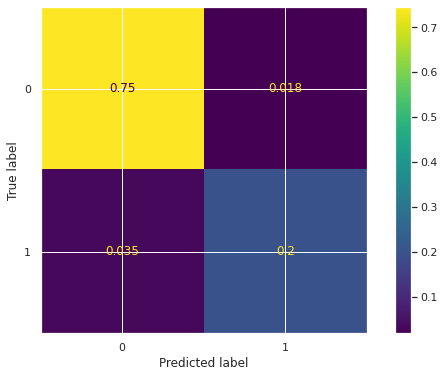

In [108]:
norm_conf_matrix = metrics.confusion_matrix(y_test_pca, reduced_pred)
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix/X_test_pca.shape[0])
fig.plot() #  Creates the figure
plt.show() #  Displays the figure

In [109]:
reduced_accuracy = metrics.accuracy_score(y_test_pca, reduced_pred)
reduced_miss_classification = 1 - reduced_accuracy
print("Misclassification rate:", reduced_miss_classification)

Misclassification rate: 0.05261886062949317


# 7. Random Forest

## 7.1 Model construction

In [110]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [111]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_depth = 12, max_leaf_nodes = 120, 
                                 n_jobs=-1, random_state=42, bootstrap=True)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_valid)

In [112]:
conf_matrix = metrics.confusion_matrix(y_valid, y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

In [113]:
specificity = true_neg / (true_neg + false_pos)
print("Specificity:", specificity)

Specificity: 0.9876640835046655


In [114]:
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity:", sensitivity)

Sensitivity: 0.7445610442794983


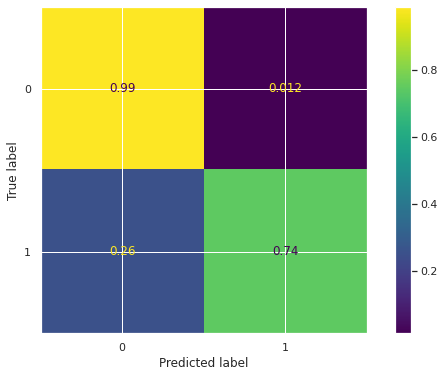

In [115]:
norm_conf_matrix = metrics.confusion_matrix(y_valid, y_pred, normalize = 'true')
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix)
fig.plot() #  Creates the figure
plt.show() #  Displays the figure

In [116]:
accuracy = metrics.accuracy_score(y_valid, y_pred)
misclassification = 1 - accuracy
print("Misclassification rate:", misclassification)

Misclassification rate: 0.06971545943333535


In [117]:
from sklearn.metrics import f1_score 
f1_score(y_valid, y_pred)

0.8344807802639127

## 7.2 Model Evaluation - Test

In [118]:
test_pred = rnd_clf.predict(X_test)
test_conf_matrix = metrics.confusion_matrix(y_test, test_pred)
test_true_neg, test_false_pos, test_false_neg, test_true_pos = test_conf_matrix.ravel()

In [119]:
test_specificity = test_true_neg / (test_true_neg + test_false_pos)
print("Test Specificity:", test_specificity)

Test Specificity: 0.9899620613341764


In [120]:
test_sensitivity = test_true_pos / (test_true_pos + test_false_neg)
print("Test Sensitivity:", test_sensitivity)

Test Sensitivity: 0.7421174057933864


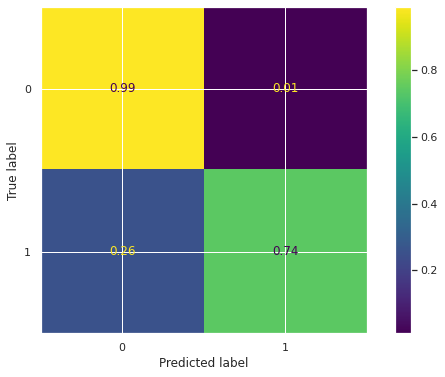

In [121]:
test_norm_conf_matrix = metrics.confusion_matrix(y_test, test_pred, normalize = 'true')
test_fig = metrics.ConfusionMatrixDisplay(test_norm_conf_matrix)
test_fig.plot() 
plt.show() 

In [122]:
test_accuracy = metrics.accuracy_score(y_test, test_pred)
test_misclassification = 1 - test_accuracy
print("Test Misclassification rate:", test_misclassification)

Test Misclassification rate: 0.06844680722527641


# 8. Model comparison: ROC curve 

In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [124]:
estimators = [('logistic', LogisticRegression(penalty = 'l2',max_iter=500, solver='lbfgs')), 
              ('decisiontree', DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 50, random_state = 0)),
              ('ANN', network), 
              ('randforest', rnd_clf)]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/

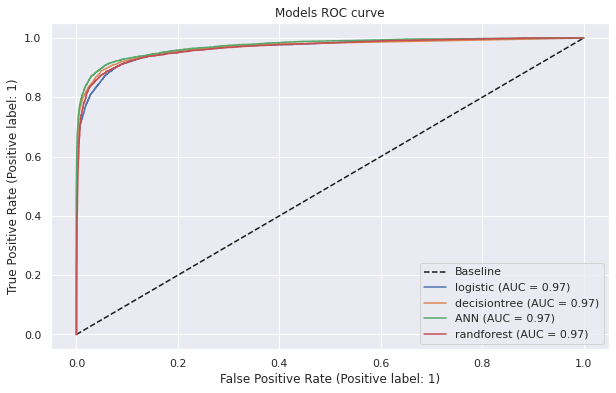

In [125]:
fig,ax=plt.subplots()

plt.plot([0, 1], [0, 1], 'k--', label='Baseline') # dashed diagonal

for name, model in estimators:
    if name == "logistic":
        log = LogisticRegression(penalty = 'l2',max_iter=500, solver='lbfgs')
        log.fit(X_test_pca,y_test_pca)
        metrics.plot_roc_curve(log, X_test_pca, y_test_pca, ax=ax, name='logistic')
    else:    
        model.fit(X_train, y_train)
        metrics.plot_roc_curve(model, X_test, y_test, ax=ax, name=name)
plt.title("Models ROC curve")
fig.show()